In [ ]:
"""!pip install numpy
!pip install networkx
!pip install matplotlib
!pip install pandas
!pip install tqdm"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import networkx as nx
import os
import json

from utils_graphs import *

/home/msuarez/Escritorio/github/TFM_Manuel_Suarez_Roman/utils_graphs.py:157: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  if not criterio is "b":


In [3]:
datasets_folder = "datasets/"
graphs_folder = "graphs/"
measures_folder = "measures/"
plots_folder = "plots/"

# Análisis Exploratorio de Datos (EDA) y creación de grafos

In [3]:
df_nat = read_data("nat", datasets_folder=datasets_folder)
df_9n = read_data("9n", datasets_folder=datasets_folder)

## Número de usuarios y hashtags únicos por hora

In [4]:
print("No al tarifazo: número de usuarios únicos:", df_nat["user"].unique().shape[0], ", hashtags únicos:", df_nat["hashtag"].unique().shape[0], ", horas únicas:", df_nat["hour"].unique().shape[0], "en el conjunto de datos.\n")
print("9n: número de usuarios únicos:", df_9n["user"].unique().shape[0], ", hashtags únicos:", df_9n["hashtag"].unique().shape[0], ", horas únicas::", df_9n["hour"].unique().shape[0], "en el conjunto de datos.")

No al tarifazo: número de usuarios únicos: 9670 , hashtags únicos: 23398 , horas únicas: 260 en el conjunto de datos.

9n: número de usuarios únicos: 8022 , hashtags únicos: 18717 , horas únicas:: 97 en el conjunto de datos.


In [5]:
# Añado el numero de usuarios y hashtags únicos a sendos arrays

hour_nat = np.sort(df_nat["hour"].unique())
hour_9n = np.sort(df_9n["hour"].unique())

num_user_nat = []
num_hashtag_nat = []
for hour in hour_nat:
    df_hour_nat = df_nat[df_nat["hour"] == hour]
    num_user_nat.append(len(df_hour_nat["user"].unique()))
    num_hashtag_nat.append(len(df_hour_nat["hashtag"].unique()))

num_user_9n = []
num_hashtag_9n = []
for hour in np.sort(df_9n["hour"].unique()):
    df_hour_9n = df_9n[df_9n["hour"] == hour]
    num_user_9n.append(len(df_hour_9n["user"].unique()))
    num_hashtag_9n.append(len(df_hour_9n["hashtag"].unique()))

In [6]:
# Convierto la hora a formato año, mes, día, hora
hour_nat_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_nat]
hour_9n_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_9n]

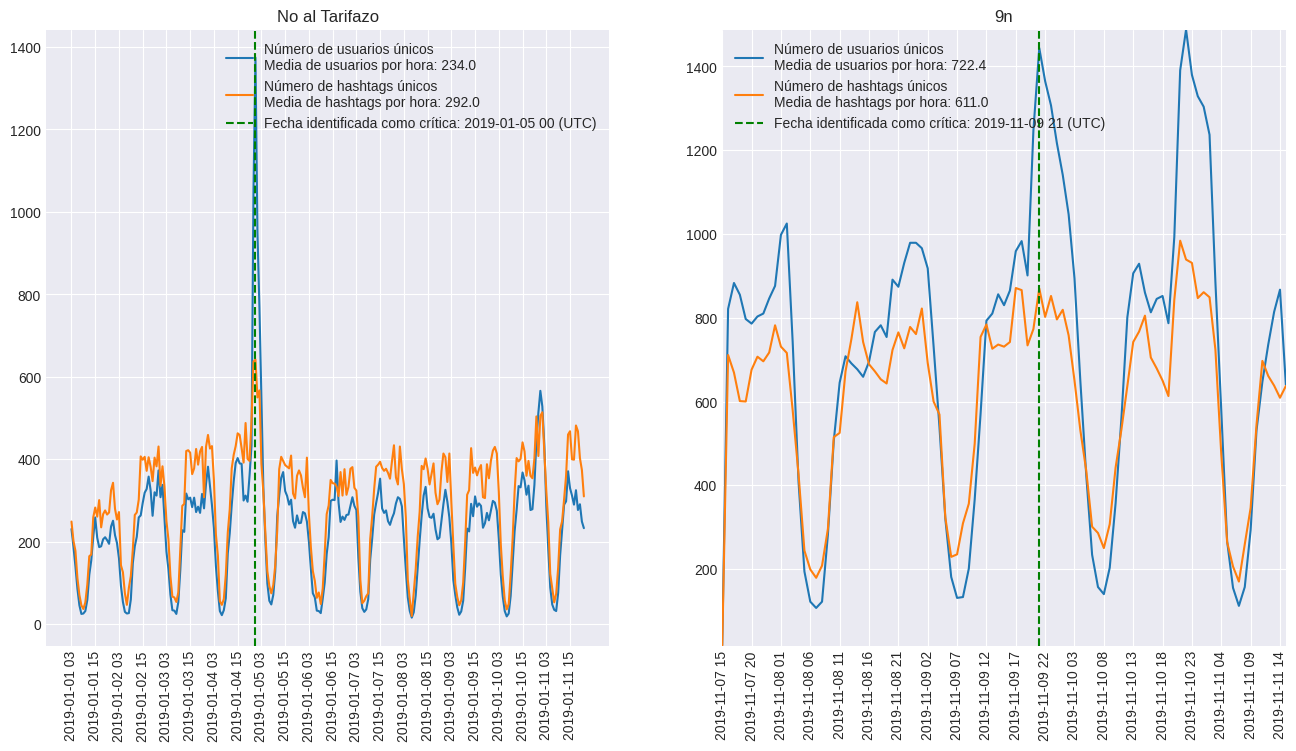

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,8)

axs[0].set_title("No al Tarifazo")
axs[0].plot(hour_nat_dt, num_user_nat, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_nat), 1)))
axs[0].plot(hour_nat_dt, num_hashtag_nat, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_nat), 1)))
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
axs[0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
axs[0].set_xticks(hour_nat_dt[::12])
axs[0].set_xticklabels(hour_nat_dt[::12])
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()

axs[1].set_title("9n")
axs[1].plot(hour_9n_dt, num_user_9n, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_9n), 1)))
axs[1].plot(hour_9n_dt, num_hashtag_9n, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_9n), 1)))
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
axs[1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
axs[1].set_xticks(hour_9n_dt[::5])
axs[1].set_xticklabels(hour_9n_dt[::5])
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend()

plt.autoscale(tight=True)
plt.savefig(plots_folder + "num_unique_users_hashtags.png")
plt.show()


## Creación de redes por hora

In [8]:
# Creamos grafos de la manifestación del 9n
manifestacion = "9n"

create_graphs("hashtag", "user", df_9n, manifestacion, graphs_folder=graphs_folder)

create_graphs("user", "hashtag", df_9n, manifestacion, graphs_folder=graphs_folder)

create_bipartite_graph(df_9n, manifestacion, graphs_folder=graphs_folder)

# Creamos grafos de la manifestación del No al Tarifazo
manifestacion = "nat"

create_graphs("hashtag", "user", df_nat, manifestacion, graphs_folder=graphs_folder)

create_graphs("user", "hashtag", df_nat, manifestacion, graphs_folder=graphs_folder)

create_bipartite_graph(df_nat, manifestacion, graphs_folder=graphs_folder)

Creando redes de hashtag unidos si comparten uno o más user , manifestación seleccionada: 9n número de horas:  97
Creando redes de user unidos si comparten uno o más hashtag , manifestación seleccionada: 9n número de horas:  97
Creando redes bipartitas, manifestación seleccionada: 9n número de horas:  97
Creando redes de hashtag unidos si comparten uno o más user , manifestación seleccionada: nat número de horas:  260
Creando redes de user unidos si comparten uno o más hashtag , manifestación seleccionada: nat número de horas:  260
Creando redes bipartitas, manifestación seleccionada: nat número de horas:  260


## Número  de nodos y aristas en los grafos generados por hora

In [10]:
# Se leen los grafos creados para cada hora y se almacena el número de nodos y de aristas de cada uno
num_edges_nat = []
num_nodes_nat = []
for hour in hour_nat:
    G = nx.read_gexf("graphs/nodes_hashtag/nat/" + str(hour) + '.gexf')
    num_edges_nat.append(G.number_of_edges())
    num_nodes_nat.append(G.number_of_nodes())

num_edges_9n = []
num_nodes_9n = []
for hour in hour_9n:
    G = nx.read_gexf("graphs/nodes_hashtag/9n/" + str(hour) + '.gexf')
    num_edges_9n.append(G.number_of_edges())
    num_nodes_9n.append(G.number_of_nodes())

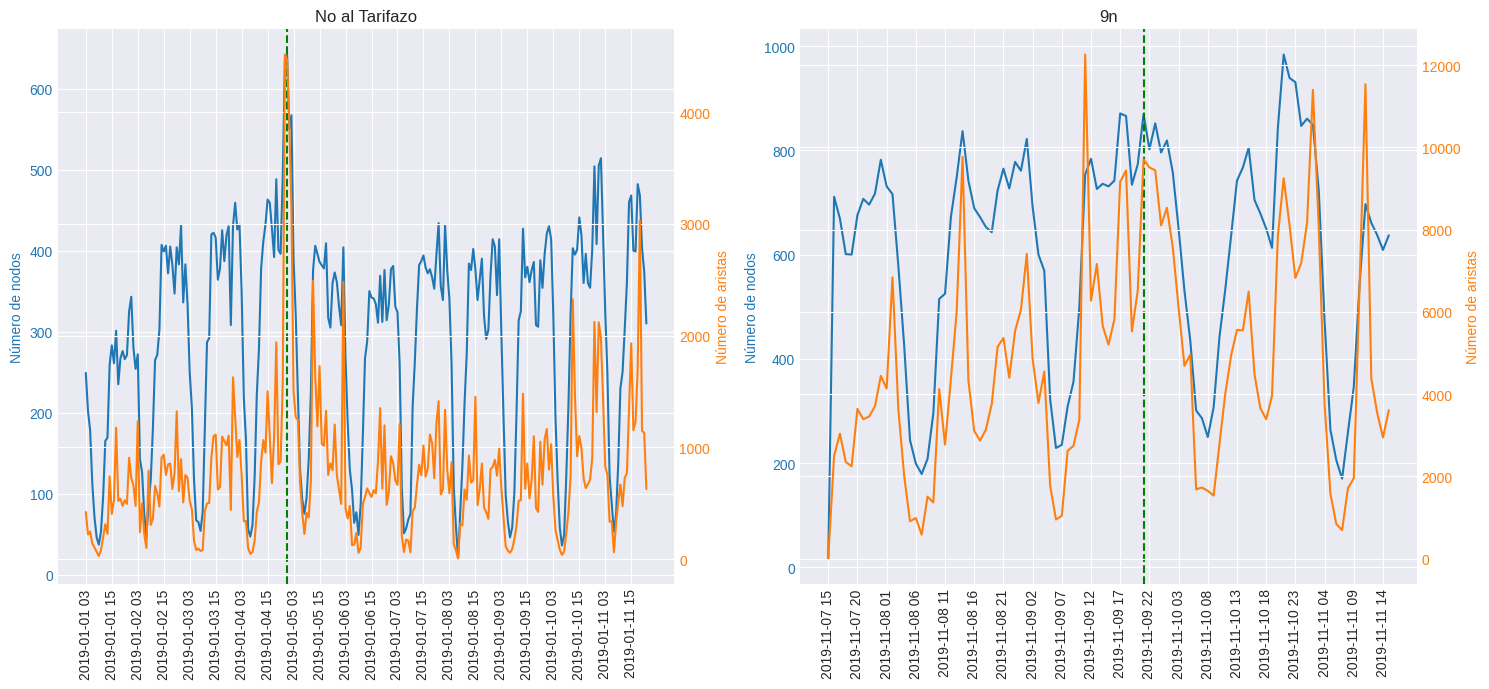

In [12]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(hour_nat_dt, num_nodes_nat, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_nat), 1)))
ax1.set_ylabel('Número de nodos', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
ax1.axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax1b = ax1.twinx()
ax1b.plot(hour_nat_dt, num_edges_nat, '#ff7f0e', label="Número de aristas \nMedia de aristas por hora: " +str(round(np.mean(num_edges_nat), 1)))
ax1b.set_ylabel('Número de aristas', color='#ff7f0e')
ax1b.tick_params(axis='y', labelcolor='#ff7f0e')
ax1.set_title('No al Tarifazo')
ax1.set_xticks(hour_nat_dt[::12])
ax1.set_xticklabels(hour_nat_dt[::12])
ax1.tick_params(axis='x', rotation=90)

ax2.plot(hour_9n_dt, num_nodes_9n, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_9n), 1)))
ax2.set_ylabel('Número de nodos', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
ax2.axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax2b = ax2.twinx()
ax2b.plot(hour_9n_dt, num_edges_9n, '#ff7f0e', label="Número de aristas\nMedia de aristas por hora: " +str(round(np.mean(num_edges_9n), 1)))
ax2b.set_ylabel('Número de aristas', color='#ff7f0e')
ax2b.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.set_title('9n')

ax2.set_xticks(hour_9n_dt[::5])
ax2.set_xticklabels(hour_9n_dt[::5])
ax2.tick_params(axis='x', rotation=90)

fig.tight_layout()
plt.savefig(plots_folder + "num_nodes_edges.png")
plt.show()

## Coeficiente de anidamiento y modularidad por ventana horaria

In [4]:
# Manifestación: 9n
# Hashtags como nodos
hour_sort_9n_h, mod_sort_9n_h, nest_sort_9n_h = get_clust_nest_coefficient("9n", "h", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Usuarios como nodos
hour_sort_9n_u, mod_sort_9n_u, nest_sort_9n_u = get_clust_nest_coefficient("9n", "u", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Redes bipartitas
hour_sort_9n_b, mod_sort_9n_b, nest_sort_9n_b = get_clust_nest_coefficient("9n", "b", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Manifestación: No al tarifazo
# Hashtags como nodos
hour_sort_nat_h, mod_sort_nat_h, nest_sort_nat_h = get_clust_nest_coefficient("nat", "h", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Usuarios como nodos
hour_sort_nat_u, mod_sort_nat_u, nest_sort_nat_u = get_clust_nest_coefficient("nat", "u", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Redes bipartitas
hour_sort_nat_b, mod_sort_nat_b, nest_sort_nat_b = get_clust_nest_coefficient("nat", "b", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)


Calculando el anidamiento y modularidad de 9n con criterio: h


100%|██████████| 97/97 [00:00<00:00, 914264.02it/s]


Calculando el anidamiento y modularidad de 9n con criterio: u


100%|██████████| 97/97 [00:00<00:00, 1082041.19it/s]


Calculando el anidamiento y modularidad de 9n con criterio: b


100%|██████████| 97/97 [00:17<00:00,  5.42it/s]


Calculando el anidamiento y modularidad de nat con criterio: h


100%|██████████| 260/260 [00:05<00:00, 48.56it/s]


Calculando el anidamiento y modularidad de nat con criterio: u


100%|██████████| 260/260 [00:27<00:00,  9.36it/s]


Calculando el anidamiento y modularidad de nat con criterio: b


100%|██████████| 260/260 [00:09<00:00, 26.33it/s]


In [5]:
# Convertimos el formato horario para el gráfico
dt_sort_arr_nat=[]
for hour in hour_sort_nat_b:
    dt_sort_arr_nat.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

dt_sort_arr_9n=[]
for hour in hour_sort_9n_b:
    dt_sort_arr_9n.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

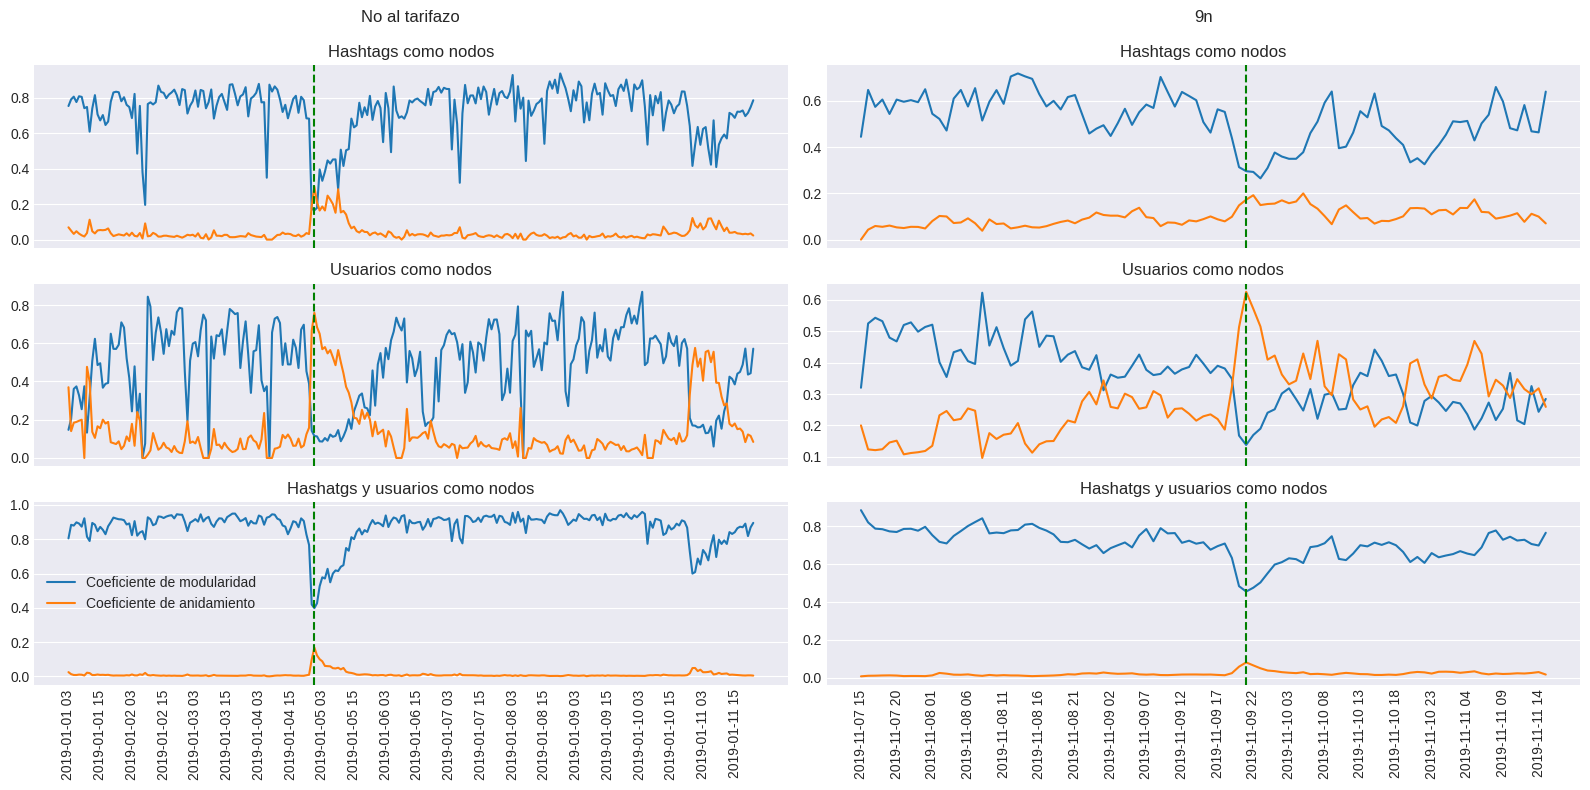

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16,8)

# No al Tarifazo
# Hashtags como nodos

axs[0, 0].plot(dt_sort_arr_nat, mod_sort_nat_h)
axs[0, 0].plot(dt_sort_arr_nat, nest_sort_nat_h)
axs[0, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 0].get_xaxis().set_visible(False)
axs[0, 0].set_title("No al tarifazo\n\nHashtags como nodos")

# Usuarios como nodos
axs[1, 0].plot(dt_sort_arr_nat, mod_sort_nat_u)
axs[1, 0].plot(dt_sort_arr_nat, nest_sort_nat_u)
axs[1, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 0].get_xaxis().set_visible(False)
axs[1, 0].set_title("Usuarios como nodos")

# Redes bipartitas
axs[2, 0].plot(dt_sort_arr_nat, mod_sort_nat_b, label = "Coeficiente de modularidad")
axs[2, 0].plot(dt_sort_arr_nat, nest_sort_nat_b, label = "Coeficiente de anidamiento")
axs[2, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 0].set_xticks(dt_sort_arr_nat[::12])
axs[2, 0].set_xticklabels(dt_sort_arr_nat[::12])
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='x', linestyle='')
axs[2, 0].legend()
axs[2, 0].set_title("Hashatgs y usuarios como nodos")

# 9n
# Hashtags como nodos

axs[0, 1].plot(dt_sort_arr_9n, mod_sort_9n_h)
axs[0, 1].plot(dt_sort_arr_9n, nest_sort_9n_h)
axs[0, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 1].get_xaxis().set_visible(False)
axs[0, 1].set_title("9n\n\nHashtags como nodos")

# Usuarios como nodos
axs[1, 1].plot(dt_sort_arr_9n, mod_sort_9n_u)
axs[1, 1].plot(dt_sort_arr_9n, nest_sort_9n_u)
axs[1, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 1].get_xaxis().set_visible(False)
axs[1, 1].set_title("Usuarios como nodos")

# Redes bipartitas
axs[2, 1].plot(dt_sort_arr_9n, mod_sort_9n_b)
axs[2, 1].plot(dt_sort_arr_9n, nest_sort_9n_b)
axs[2, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 1].set_xticks(dt_sort_arr_9n[::5])
axs[2, 1].set_xticklabels(dt_sort_arr_9n[::5])
axs[2, 1].grid(axis='x', linestyle='')
axs[2, 1].tick_params(axis='x', rotation=90)
axs[2, 1].set_title("Hashatgs y usuarios como nodos")


fig.tight_layout()
#fig.suptitle('Coeficientes de modularidad y de anidamiento para diferentes formaciones de las redes de conectividad', y=1.05)
plt.savefig(plots_folder + "mod_nest.png")
plt.show()

# Histograma, PDF, CDF y CCDF

In [ ]:
from utils_graph_generation import load_graph, get_paths
from utils_graph_metrics import get_exp, calc_pdf_points, calc_cdf_points, calc_ccdf_points
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution, plot_yerali

## HASHTAGS como nodos

In [ ]:
# No al Tarifazo

graphs_folder = "graphs/nodes_hashtag/nat/"
G_nat = load_graph("429624", graphs_folder)

# Ordenamos los grados de forma ascendente
points_nat = np.sort(np.array(list(dict(G_nat.degree()).values())).astype(float))
plfit_nat = get_exp([points_nat], "429624", show_comparative=False, only_ntamas=False)
arr_pdf_points_nat = calc_pdf_points([points_nat], G_nat.number_of_nodes())
arr_cdf_points_nat = calc_cdf_points(arr_pdf_points_nat)
arr_ccdf_points_nat = calc_ccdf_points(arr_cdf_points_nat)

# 9n

graphs_folder = "graphs/nodes_hashtag/9n/"
G_9n = load_graph("437037", graphs_folder)

# Ordenamos los grados de forma ascendente
points_9n= np.sort(np.array(list(dict(G_9n.degree()).values())).astype(float))
plfit_9n = get_exp([points_9n], "437037", show_comparative=False, only_ntamas=False)
arr_pdf_points_9n = calc_pdf_points([points_9n], G_9n.number_of_nodes())
arr_cdf_points_9n = calc_cdf_points(arr_pdf_points_9n)
arr_ccdf_points_9n = calc_ccdf_points(arr_cdf_points_9n)

Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.1930724612278993
sigma: 0.07545652782206182
x_min: 9.0
(Kolgomorov Smirnov) D: 0.06040966884865273
Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709
Calculating best minimal value for power law fit
xmin progress: 99%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.621464855460853
sigma: 0.1323920510578256
x_min: 34.0
(Kolgomorov Smirnov) D: 0.04990063530124872


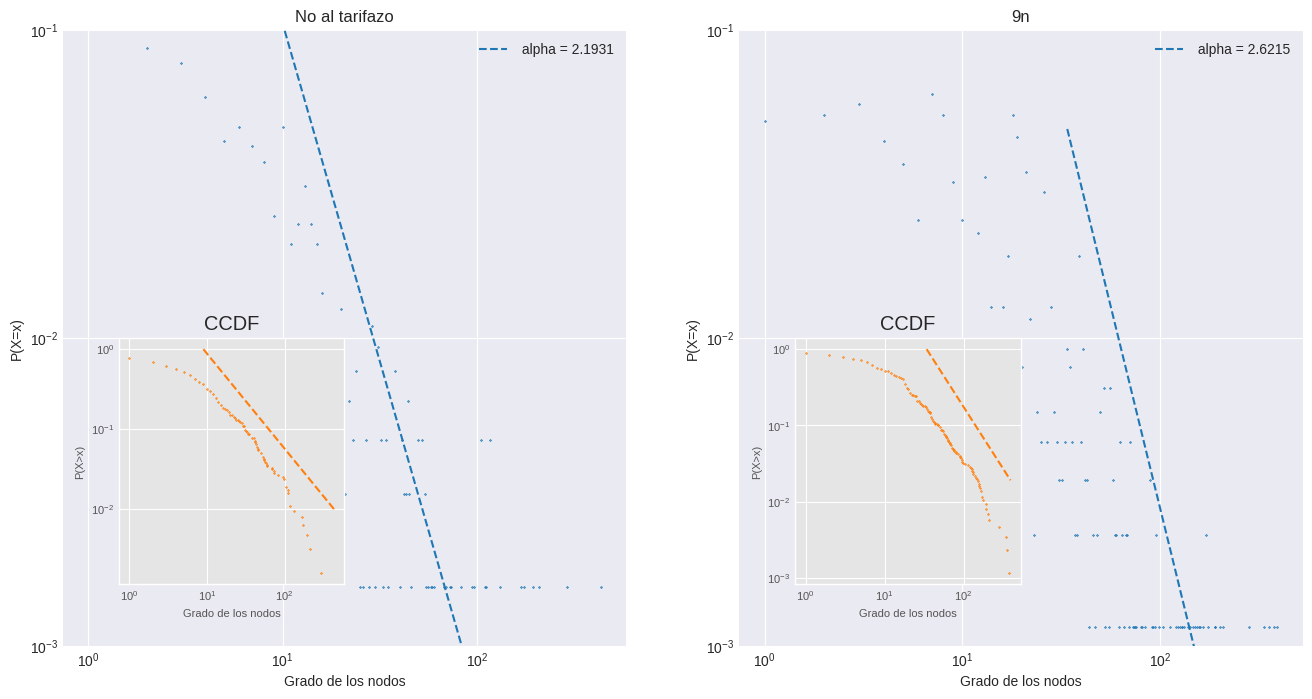

In [11]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,8)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=axs[0], linestyle='--')
axs[0].set_ylim(0.001, 0.1)

axs[0].set_xlabel("Grado de los nodos")
axs[0].set_ylabel("P(X=x)")
axs[0].set_title("No al tarifazo")
axs[0].legend()

with plt.style.context('ggplot'):
    ins_ax_nat = axs[0].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=axs[1], linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
axs[1].legend()
axs[1].set_ylim(0.001, 0.1)

axs[1].set_xlabel("Grado de los nodos")
axs[1].set_ylabel("P(X=x)")
axs[1].set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = axs[1].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
    
plt.savefig("plots/PDF_CCDFs_nodes_hashtag.png")
plt.show()



## Usuarios como nodos

## Redes bipartitas

# AUTOSIMILITUD

In [1]:
import matplotlib.pyplot as plt
import os
import json

from utils_graph_generation import get_paths,load_graph
from utils_graph_plot import get_all_markers
from tqdm import tqdm
from utils_graph_metrics import tresh_normalization, calc_avg_degree, convert_keys_to_float,calc_clust
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/msuarez/Escritorio/TFM_v_llanes/Social_Manifestations_Fractal/llanes/utils_graph_metrics.py:207: SyntaxWarning: invalid escape sequence '\s'
  """print("-----------------------------------")


# Grado medio por Kt

In [2]:
# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 200

dict_hora_nat = {}
G_nat = load_graph("429624", "graphs/nodes_hashtag/nat/")
arr_medium_deg = []
for treshold in tqdm(range(MAX_UMBRAL)):
    treshold = float(treshold)
    if not treshold in dict_hora_nat.keys():
        # Creamos el subgrafo basándonos en el treshold seleccionado
        F = tresh_normalization(G_nat,  treshold)
        if F == -1:
            # Caso de grafo vacío o grafo inconexo
            break 
        dict_hora_nat[treshold] = calc_avg_degree(F)

dict_hora_9n = {}
G_9n = load_graph("437037", "graphs/nodes_hashtag/9n/")
arr_medium_deg = []
for treshold in tqdm(range(MAX_UMBRAL)):
    treshold = float(treshold)
    if not treshold in dict_hora_9n.keys():
        # Creamos el subgrafo basándonos en el treshold seleccionado
        F = tresh_normalization(G_9n,  treshold)
        if F == -1:
            # Caso de grafo vacío o grafo inconexo
            break 
        dict_hora_9n[treshold] = calc_avg_degree(F)

graphs/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


100%|██████████| 200/200 [00:00<00:00, 543.91it/s]


graphs/nodes_hashtag/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


100%|██████████| 200/200 [00:01<00:00, 177.41it/s]


/tmp/ipykernel_88290/3187272700.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


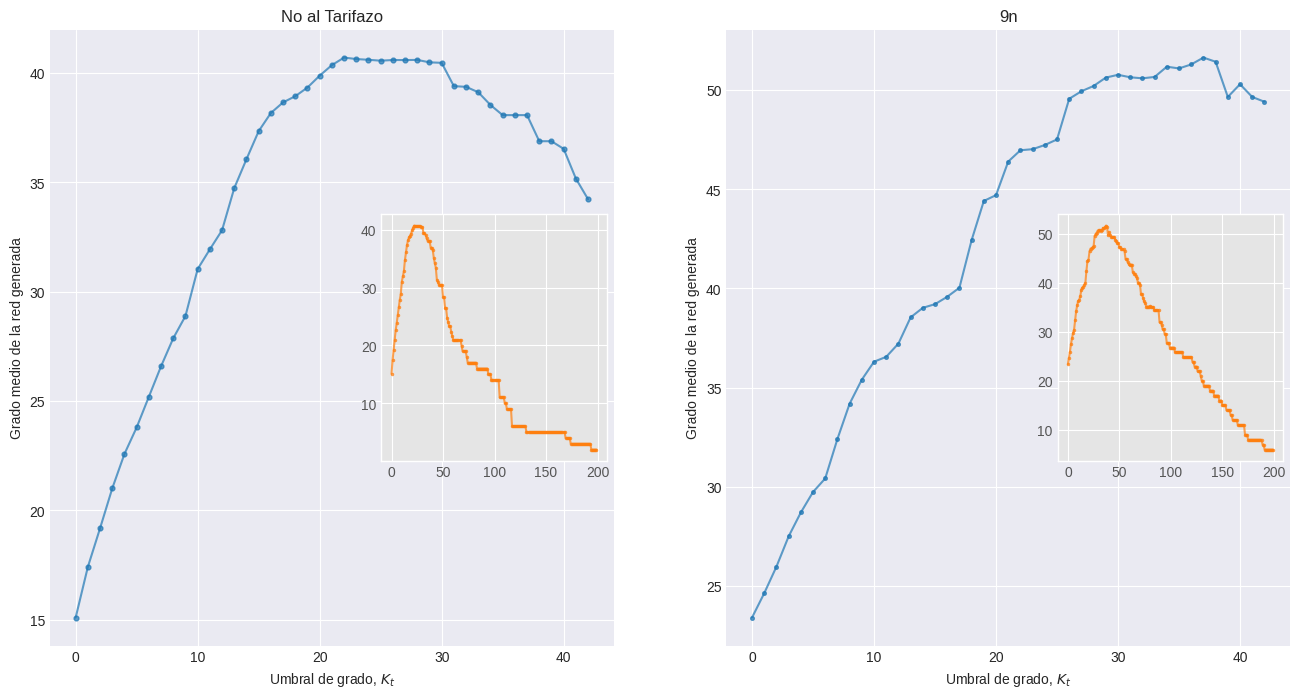

In [4]:
alpha=0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

ax1.plot(list(dict_hora_nat.keys())[0:43], list(dict_hora_nat.values())[0:43], alpha=0.7)
ax1.scatter(list(dict_hora_nat.keys())[0:43], list(dict_hora_nat.values())[0:43], s=12, alpha=alpha)
ax1.set_title("No al Tarifazo")

with plt.style.context('ggplot'):
    ax1_inset = inset_axes(ax1, width="40%", height="40%", loc="center right")  # Dimensiones y ubicación del inset
    ax1_inset.plot(list(dict_hora_nat.keys()), list(dict_hora_nat.values()), alpha=0.7, c='#ff7f0e')
    ax1_inset.scatter(list(dict_hora_nat.keys()), list(dict_hora_nat.values()), s=4, alpha=alpha, c='#ff7f0e')

ax2.plot(list(dict_hora_9n.keys())[0:43], list(dict_hora_9n.values())[0:43], alpha=alpha)
ax2.scatter(list(dict_hora_9n.keys())[0:43], list(dict_hora_9n.values())[0:43], s=7, alpha=alpha)
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ax2_inset = inset_axes(ax2, width="40%", height="40%", loc="center right")  # Dimensiones y ubicación del inset
    ax2_inset.plot(list(dict_hora_9n.keys()), list(dict_hora_9n.values()), alpha=alpha, c='#ff7f0e')
    ax2_inset.scatter(list(dict_hora_9n.keys()), list(dict_hora_9n.values()), s=4, alpha=alpha, c='#ff7f0e')
    ax2_inset.get_xaxis().set_visible(True)

ax1.set_ylabel("Grado medio de la red generada")
ax1.set_xlabel("Umbral de grado, $K_t$")
ax2.set_ylabel("Grado medio de la red generada")
ax2.set_xlabel("Umbral de grado, $K_t$")
plt.title
plt.legend()
plt.show()
plt.style.use('seaborn-v0_8-darkgrid')

## Figura Autosimilitud

In [1]:
import matplotlib.pyplot as plt
import os
import json

from utils_graph_generation import get_paths,load_graph
from utils_graph_plot import get_all_markers
from tqdm import tqdm
from utils_graph_metrics import tresh_normalization, calc_avg_degree, convert_keys_to_float,calc_clust
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/msuarez/Escritorio/TFM_v_llanes/Social_Manifestations_Fractal/llanes/utils_graph_metrics.py:207: SyntaxWarning: invalid escape sequence '\s'
  """print("-----------------------------------")


In [83]:
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder, measures_name, deg=True, mode="h"):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL, measures_name, deg=deg, mode=mode)

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 500

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_tres_avg_clust_fig2e_nat_h, dict_norm_int_deg_fig2a_nat_h = calc_plots("429624", MAX_UMBRAL, "graphs/nodes_hashtag/nat/", "measures/nat/429624", deg=True)
dict_tres_avg_clust_fig2e_9n_h, dict_norm_int_deg_fig2a_9n_h = calc_plots("437037", MAX_UMBRAL, "graphs/nodes_hashtag/9n/", "measures/9n/437037", deg=True)

graphs/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


 58%|█████▊    | 290/500 [00:01<00:01, 178.87it/s]


graphs/nodes_hashtag/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


 76%|███████▌  | 379/500 [00:04<00:01, 89.53it/s]


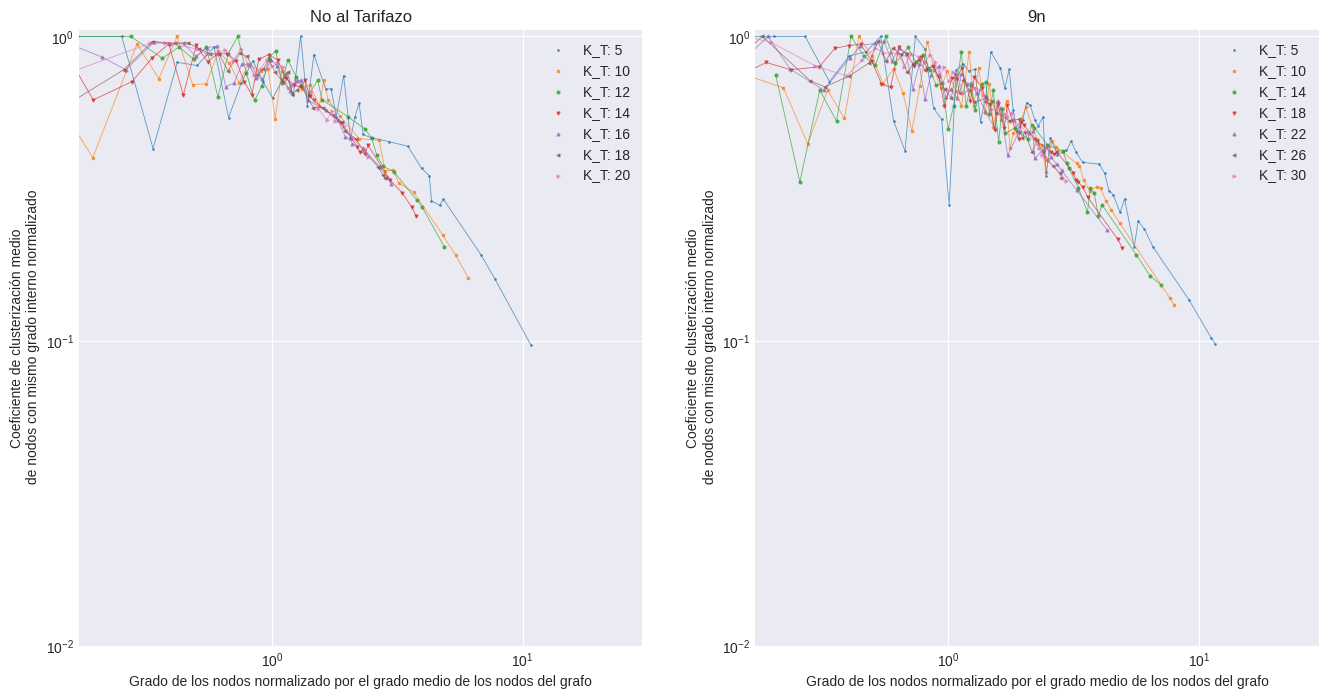

In [212]:
alpha = 0.7

arr_kt_plot_nat = [5,10,12,14,16,18,20]
arr_kt_plot_9n = [5,10,14,18,22,26,30]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_fig2a_nat_h.keys():
        points_x = list(dict_norm_int_deg_fig2a_nat_h[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_fig2a_nat_h[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.17, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_fig2a_9n_h.keys():
        points_x = list(dict_norm_int_deg_fig2a_9n_h[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_fig2a_9n_h[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.17, 30)
ax2.legend()
ax2.set_title("9n")
plt.show()

## Figura Clustering promedio

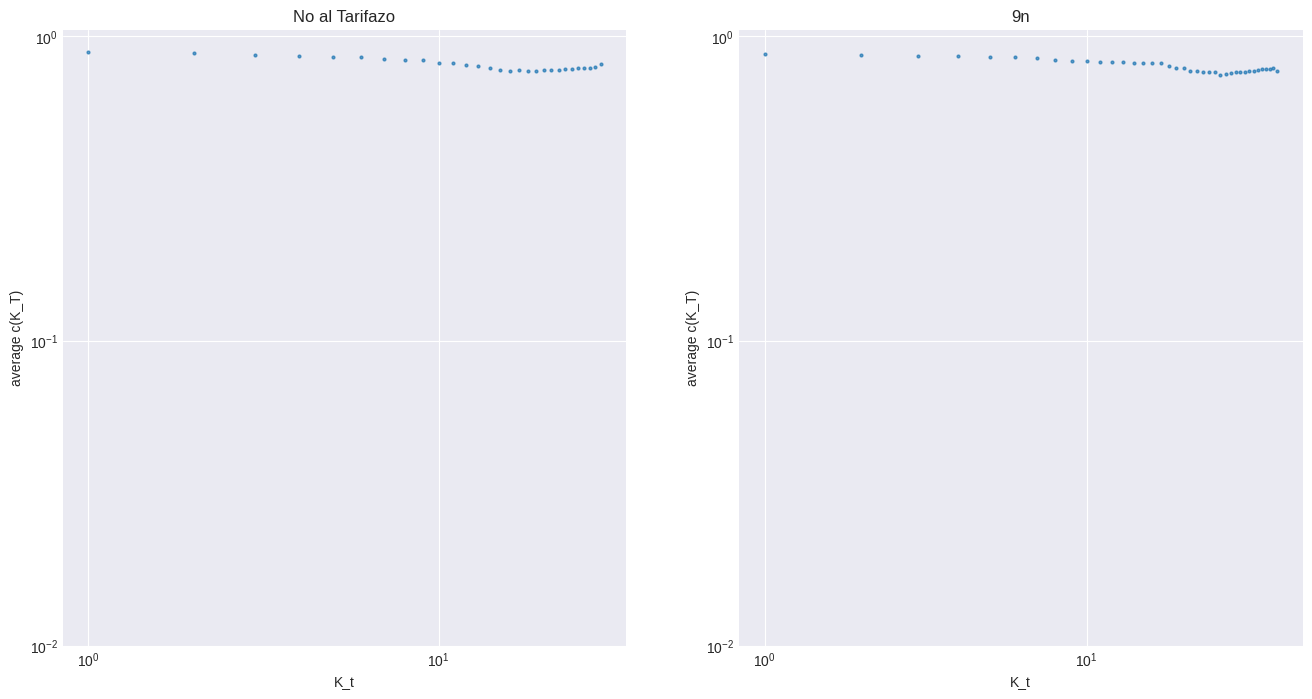

<Figure size 1400x700 with 0 Axes>

In [155]:
alpha = 0.7

arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25,30,35,40]
supreme_nat = 30
supreme_9n = 40
# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_tres_avg_clust_fig2e_nat_h.keys())[:supreme_nat]
clust_nat = list(dict_tres_avg_clust_fig2e_nat_h.values())[:supreme_nat]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_tres_avg_clust_fig2e_9n_h.keys())[:supreme_9n]
clust_9n = list(dict_tres_avg_clust_fig2e_9n_h.values())[:supreme_9n]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")



plt.show()

# PDF y CCDF de los Kt representados

In [178]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, measures_name, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250]):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
        
    arr_points = []
    dict_points = {}
    # En los archivos guardo los grados de los nodos en bruto, sin sufrir procesos de normalización
    if os.path.exists(measures_name + '_degs_kt.json'):
        try:
            with open(measures_name + '_degs_kt.json', 'r') as f:
                dict_points = json.load(f)
            dict_points = convert_keys_to_float(dict_points, tipo="int")
        except json.JSONDecodeError:
            pass

    for kt in tqdm(arr_kt_plot):
        if not kt in dict_points.keys():
            F = tresh_normalization(G, kt)
            if F != -1:
                points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float))
                dict_points[kt] = list(points_kt)
    
        else:
            points_kt = dict_points[kt]
        points_kt = np.array(points_kt) / np.mean(points_kt)

        arr_points.append(points_kt)


    # Puntos de la PDF
    arr_deg_prob = []
    for points in arr_points:
        degrees, counts = np.unique(points, return_counts=True)
        probs = counts / len(points)
        arr_deg_prob.append((degrees, probs))
    
    # Puntos de la CDF
    arr_deg_cum = []
    for deg_prob in arr_deg_prob:
        cum_freq = np.cumsum(deg_prob[1])
        cdf = cum_freq/cum_freq[-1]
        arr_deg_cum.append((deg_prob[0], cdf))

    # Puntos de la CCDF
    arr_deg_comp_cum = []
    for deg_cum in arr_deg_cum:
        ccdf = 1 - deg_cum[1]
        arr_deg_comp_cum.append((deg_cum[0], ccdf))
    return arr_deg_prob, arr_deg_comp_cum

In [235]:
arr_kt_plot_nat = [10,12,14,15,16,18,20]
arr_deg_prob_nat, arr_deg_comp_cum_nat = calc_plot_degree_distributions_tres("429624", "graphs/nodes_hashtag/nat/", "measures/nat", arr_kt_plot=arr_kt_plot_nat)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)


arr_kt_plot_9n = [10,14,18,22,26,30]
arr_deg_prob_9n, arr_deg_comp_cum_9n = calc_plot_degree_distributions_tres("437037", "graphs/nodes_hashtag/9n/", "measures/9n/", arr_kt_plot=arr_kt_plot_9n)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)

graphs/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


100%|██████████| 7/7 [00:00<00:00, 220.81it/s]


graphs/nodes_hashtag/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 870, numero de aristas: 9709


100%|██████████| 6/6 [00:00<00:00, 80.23it/s]


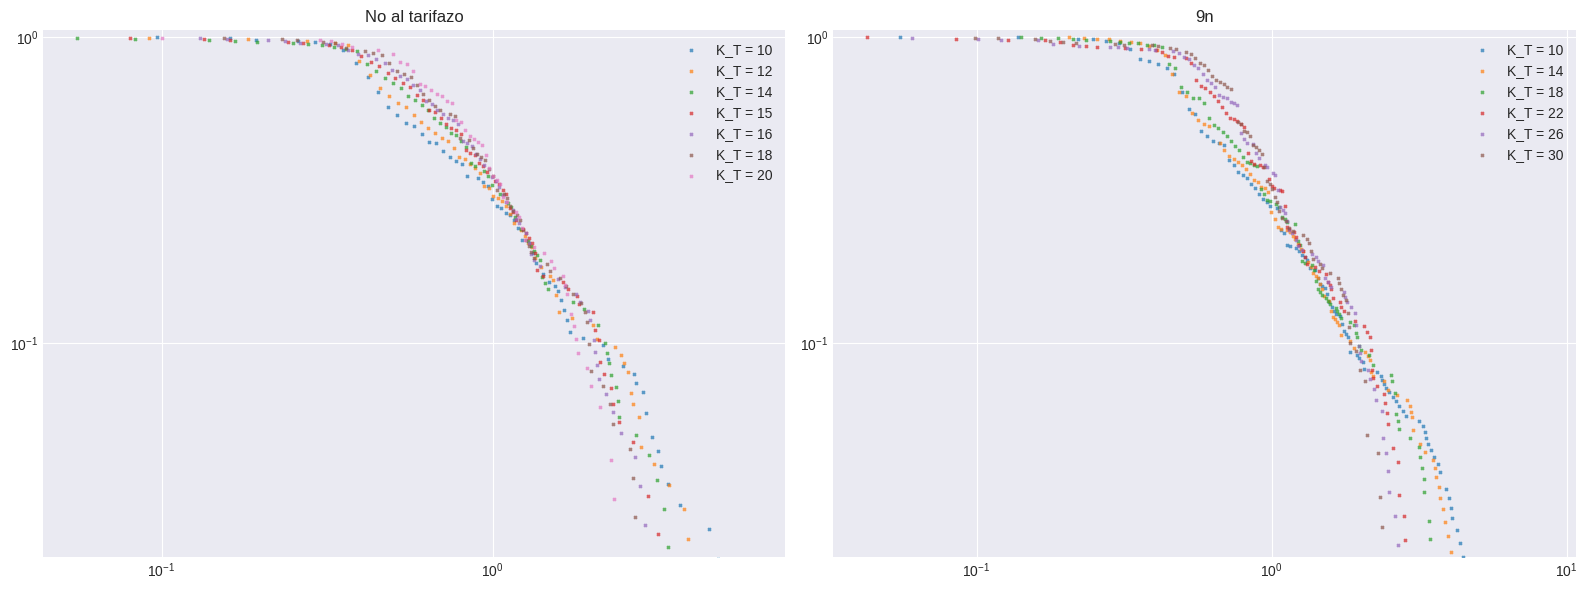

In [239]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,6)

dot_size=4
marker = "x"

#plot_scatter(arr_deg_prob, name_x=name_x, name_y=name_y, name_plot=name_plot, path=plots_folder + str(name_graph) + "_pdf.png", scale_log=scale_log, arr_kt_plot=arr_kt_plot, pl=pl)



# LAdo izquierdo: NAT

"""for index, points in enumerate(arr_deg_prob_nat):
    axs[0, 0].scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_nat[index]))
    axs[0, 0].legend()
    axs[0, 0].set_xscale('log')
    axs[0, 0].set_yscale('log')
axs[0, 0].set_title("No al tarifazo\n\nHashtags como nodos")"""


for index, points in enumerate(arr_deg_comp_cum_nat):
    axs[0].scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_nat[index]))
    axs[0].legend()
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_ylim(0.02, 1.05)
axs[0].set_title("No al tarifazo")


"""for index, points in enumerate(arr_deg_prob_9n):
    axs[0, 1].scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_9n[index]))
    axs[0, 1].legend()
    axs[0, 1].set_xscale('log')
    axs[0, 1].set_yscale('log')
axs[0, 1].set_title("9n\n\nHashtags como nodos")"""


for index, points in enumerate(arr_deg_comp_cum_9n):
    axs[1].scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_9n[index]))
    axs[1].legend()
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_ylim(0.02, 1.05)
axs[1].set_title("9n")



fig.tight_layout()
#fig.suptitle('Coeficientes de modularidad y de anidamiento para diferentes formaciones de las redes de conectividad', y=1.05)



## Resultados en otras ventanas temporales

In [303]:
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder, measures_name, deg=True, mode="h"):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL, measures_name, deg=deg, mode=mode)

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 500

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
hora_nat = "429600"
dict_tres_avg_clust_fig2e_nat_h, dict_norm_int_deg_fig2a_nat_h = calc_plots(hora_nat, MAX_UMBRAL, "graphs/nodes_hashtag/nat/", "measures/nat/"+hora_nat, deg=True)
hora_9n = "437002"
dict_tres_avg_clust_fig2e_9n_h, dict_norm_int_deg_fig2a_9n_h = calc_plots(hora_9n, MAX_UMBRAL, "graphs/nodes_hashtag/9n/", "measures/9n/"+hora_9n, deg=True)

graphs/nodes_hashtag/nat/429600.gexf
Cargado el grafo de la hora 429600, numero de nodos: 459, numero de aristas: 1262


 12%|█▏        | 59/500 [00:00<00:00, 842.42it/s]


graphs/nodes_hashtag/9n/437017.gexf
Cargado el grafo de la hora 437017, numero de nodos: 822, numero de aristas: 7410


 48%|████▊     | 240/500 [00:02<00:03, 81.90it/s] 


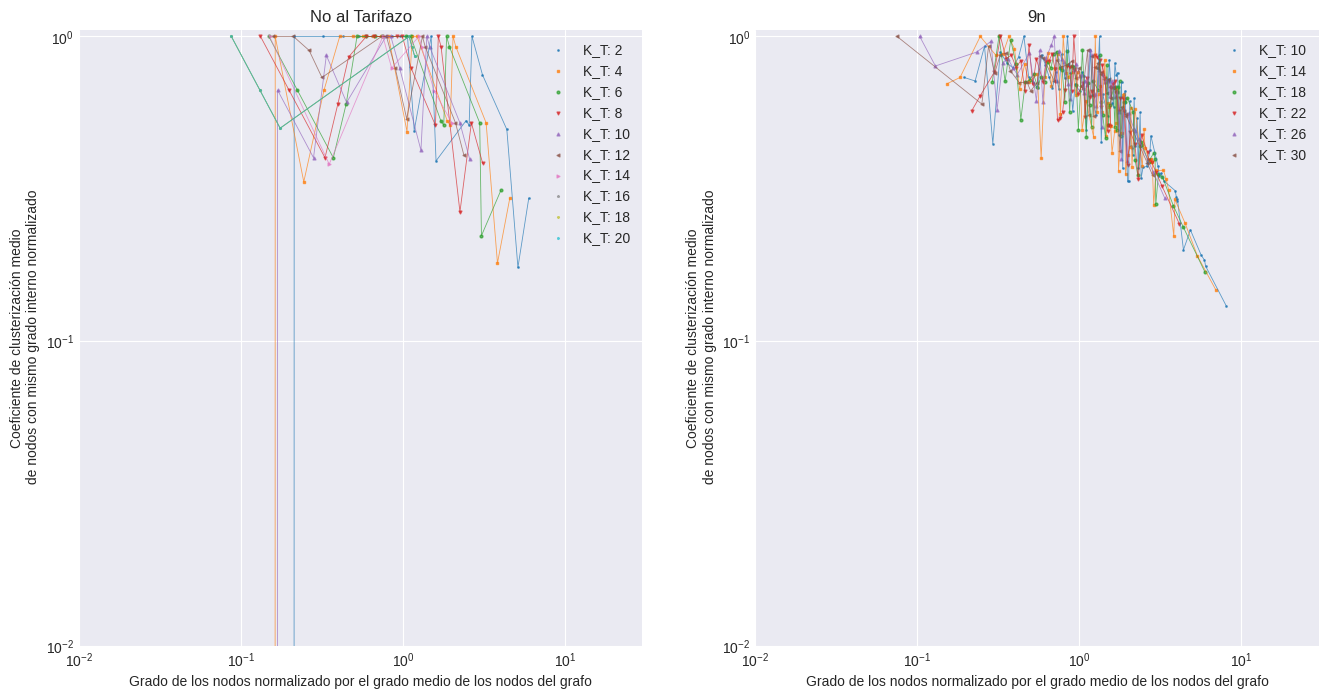

In [305]:
alpha = 0.7

arr_kt_plot_nat = [2,4,6,8,10,12,14,16,18,20]
arr_kt_plot_9n = [10,14,18,22,26,30]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_fig2a_nat_h.keys():
        points_x = list(dict_norm_int_deg_fig2a_nat_h[kt].keys())
        points_y = list(dict_norm_int_deg_fig2a_nat_h[kt].values())
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.01, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_fig2a_9n_h.keys():
        points_x = list(dict_norm_int_deg_fig2a_9n_h[kt].keys())
        points_y = list(dict_norm_int_deg_fig2a_9n_h[kt].values())
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.01, 30)
ax2.legend()
ax2.set_title("9n")
plt.show()

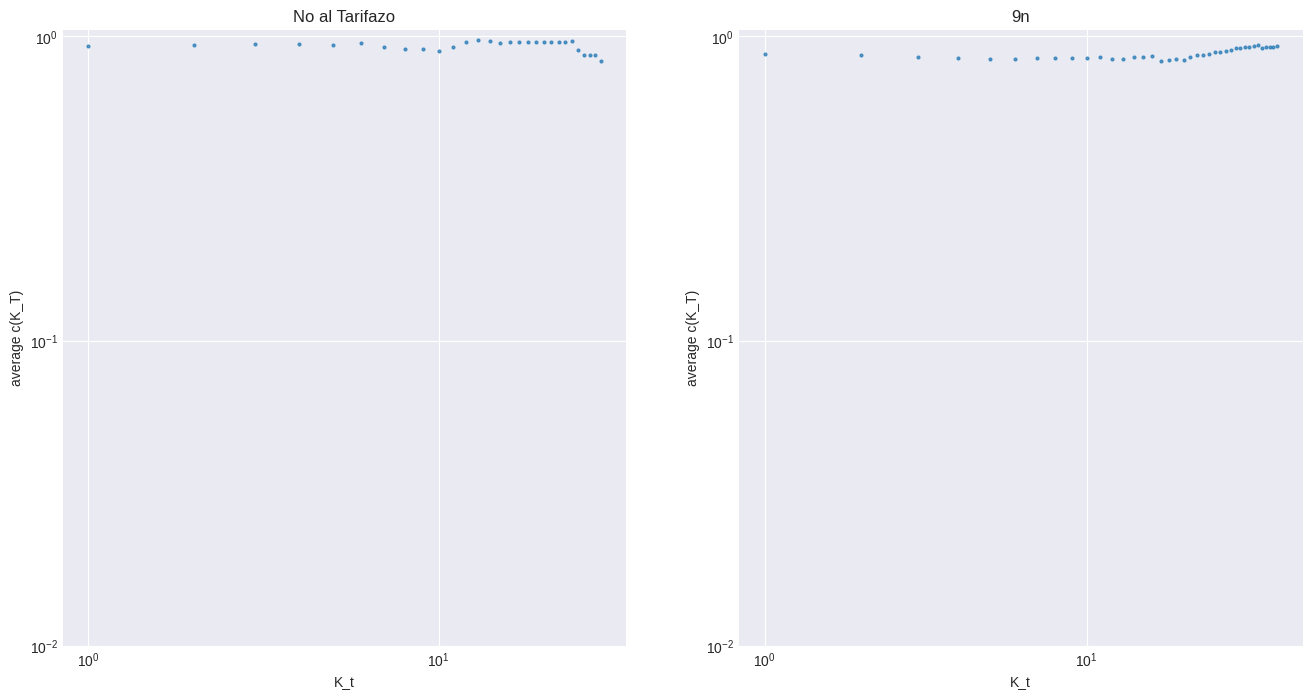

<Figure size 1400x700 with 0 Axes>

In [298]:
alpha = 0.7

arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25,30,35,40]
supreme_nat = 30
supreme_9n = 40
# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_tres_avg_clust_fig2e_nat_h.keys())[:supreme_nat]
clust_nat = list(dict_tres_avg_clust_fig2e_nat_h.values())[:supreme_nat]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_tres_avg_clust_fig2e_9n_h.keys())[:supreme_9n]
clust_9n = list(dict_tres_avg_clust_fig2e_9n_h.values())[:supreme_9n]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")



plt.show()

# Resultados en otras redes

## Usuarios como nodos de los grafos

### Ajuste a ley de potencia

In [ ]:
# No al Tarifazo

graphs_folder = "graphs/nodes_user/nat/"
G_nat = load_graph("429624", graphs_folder)

# Ordenamos los grados de forma ascendente
points_nat = np.sort(np.array(list(dict(G_nat.degree()).values())).astype(float))
plfit_nat = get_exp([points_nat], "429624", show_comparative=False, only_ntamas=False)
arr_pdf_points_nat = calc_pdf_points([points_nat], G_nat.number_of_nodes())
arr_cdf_points_nat = calc_cdf_points(arr_pdf_points_nat)
arr_ccdf_points_nat = calc_ccdf_points(arr_cdf_points_nat)

# 9n

graphs_folder = "graphs/nodes_user/9n/"
G_9n = load_graph("437037", graphs_folder)

# Ordenamos los grados de forma ascendente
points_9n= np.sort(np.array(list(dict(G_9n.degree()).values())).astype(float))
plfit_9n = get_exp([points_9n], "437037", show_comparative=False, only_ntamas=False)
arr_pdf_points_9n = calc_pdf_points([points_9n], G_9n.number_of_nodes())
arr_cdf_points_9n = calc_cdf_points(arr_pdf_points_9n)
arr_ccdf_points_9n = calc_ccdf_points(arr_cdf_points_9n)

Cargado el grafo de la hora 429624, numero de nodos: 1374, numero de aristas: 537866
Calculating best minimal value for power law fit
xmin progress: 99%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 48.525167895826726
sigma: 4.320469808711521
x_min: 1104.0
(Kolgomorov Smirnov) D: 0.10228260186220173
Cargado el grafo de la hora 437037, numero de nodos: 1444, numero de aristas: 362948
Calculating best minimal value for power law fit
xmin progress: 99%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 11.270099338461046
sigma: 0.5768262465257108
x_min: 837.0
(Kolgomorov Smirnov) D: 0.07435654221548191


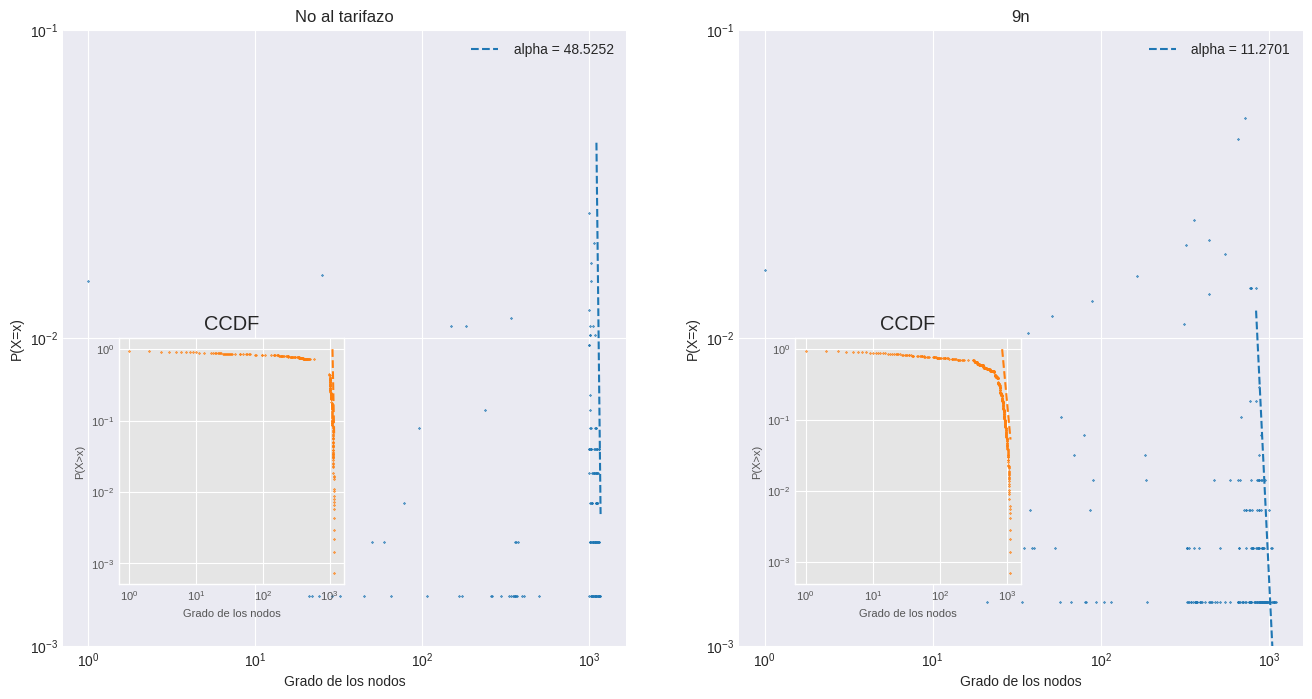

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,8)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=axs[0], linestyle='--')
axs[0].set_ylim(0.001, 0.1)

axs[0].set_xlabel("Grado de los nodos")
axs[0].set_ylabel("P(X=x)")
axs[0].set_title("No al tarifazo")
axs[0].legend()

with plt.style.context('ggplot'):
    ins_ax_nat = axs[0].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=axs[1], linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
axs[1].legend()
axs[1].set_ylim(0.001, 0.1)

axs[1].set_xlabel("Grado de los nodos")
axs[1].set_ylabel("P(X=x)")
axs[1].set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = axs[1].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
    
plt.savefig("plots/PDF_CCDFs_nodes_user.png")
plt.show()



### Autosimilitud

In [89]:
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder, measures_name, deg=True, mode="u"):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL, measures_name, deg=deg, mode=mode)

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_tres_avg_clust_fig2e_nat_u, dict_norm_int_deg_fig2a_nat_u = calc_plots("429624", MAX_UMBRAL, "graphs/nodes_user/nat/", "measures/nat/429624", deg=True)
dict_tres_avg_clust_fig2e_9n_u, dict_norm_int_deg_fig2a_9n_u = calc_plots("437037", MAX_UMBRAL, "graphs/nodes_user/9n/", "measures/9n/437037", deg=True)

graphs/nodes_user/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 1374, numero de aristas: 537866


100%|██████████| 250/250 [00:25<00:00,  9.81it/s]


graphs/nodes_user/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 1444, numero de aristas: 362948


100%|██████████| 250/250 [00:44<00:00,  5.67it/s]


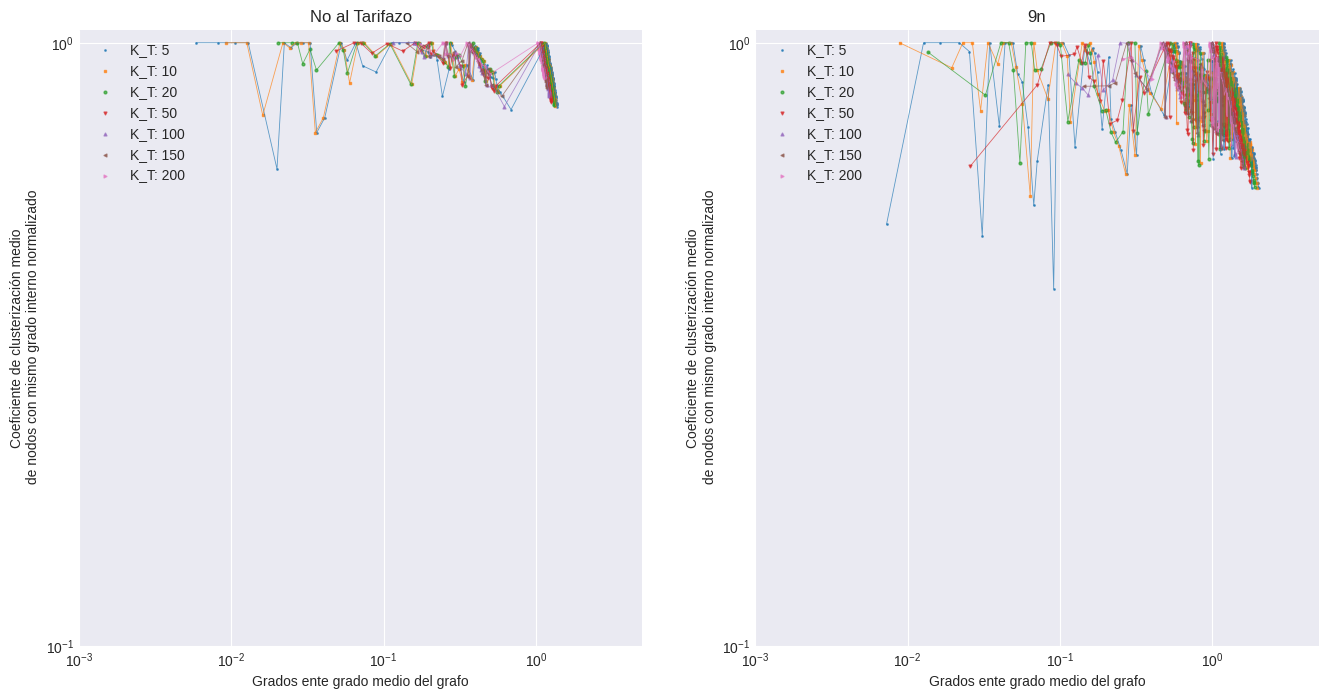

In [90]:
alpha = 0.7

arr_kt_plot_nat = [5,10,20,50,100,150,200,250,300,350]
arr_kt_plot_9n = [5,10,20,50,100,150,200,250,300,350]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_fig2a_nat_u.keys():
        points_x = list(dict_norm_int_deg_fig2a_nat_u[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_fig2a_nat_u[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_u[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grados ente grado medio del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.1, 1.05)
ax1.set_xlim(0.001, 5)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_fig2a_9n_u.keys():
        points_x = list(dict_norm_int_deg_fig2a_9n_u[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_fig2a_9n_u[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_u[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grados ente grado medio del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.1, 1.05)
ax2.set_xlim(0.001, 5)
ax2.legend()
ax2.set_title("9n")
plt.show()

### Clustering promedio

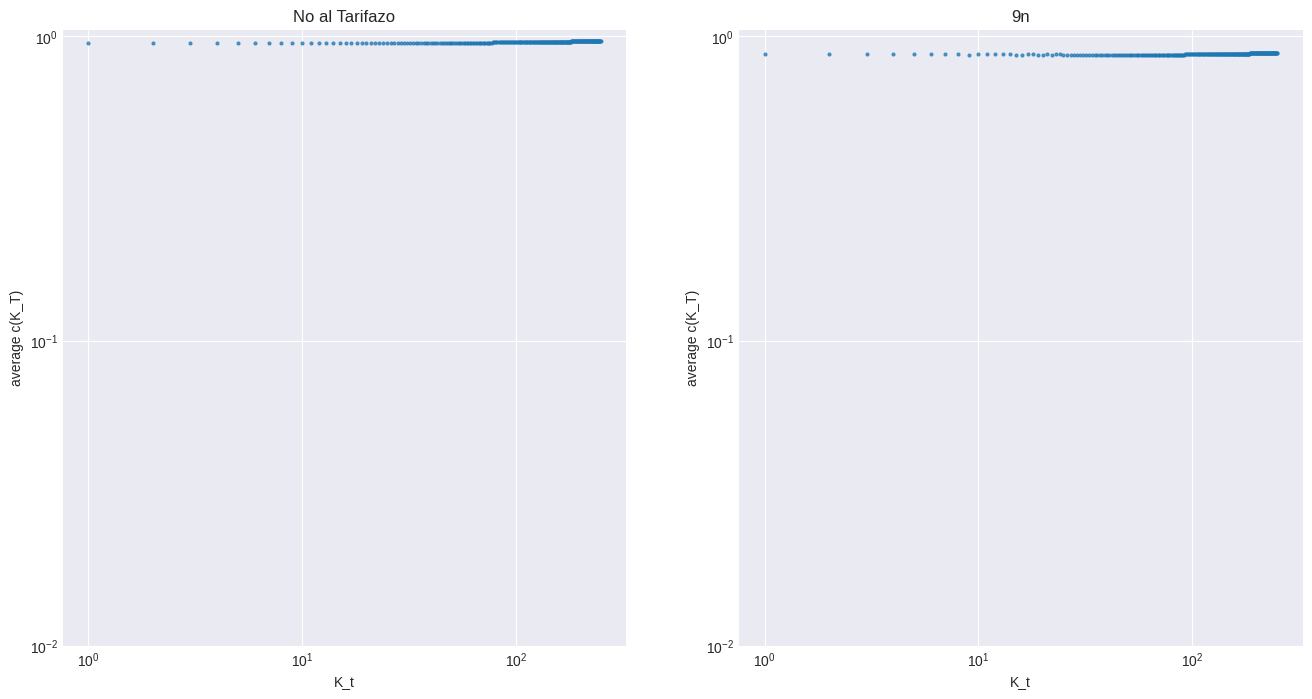

<Figure size 1400x700 with 0 Axes>

In [91]:
alpha = 0.7

arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25,30,35,40]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_tres_avg_clust_fig2e_nat_u.keys())[:MAX_UMBRAL]
clust_nat = list(dict_tres_avg_clust_fig2e_nat_u.values())[:MAX_UMBRAL]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_tres_avg_clust_fig2e_9n_u.keys())[:MAX_UMBRAL]
clust_9n = list(dict_tres_avg_clust_fig2e_9n_u.values())[:MAX_UMBRAL]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")



plt.show()

## Redes bipartitas

### Ajuste a ley de potencia

In [ ]:
# No al Tarifazo

graphs_folder = "graphs/nodes_bipartite/nat/"
G_nat = load_graph("429624", graphs_folder)

# Ordenamos los grados de forma ascendente
points_nat = np.sort(np.array(list(dict(G_nat.degree()).values())).astype(float))
plfit_nat = get_exp([points_nat], "429624", show_comparative=False, only_ntamas=False)
arr_pdf_points_nat = calc_pdf_points([points_nat], G_nat.number_of_nodes())
arr_cdf_points_nat = calc_cdf_points(arr_pdf_points_nat)
arr_ccdf_points_nat = calc_ccdf_points(arr_cdf_points_nat)

# 9n

graphs_folder = "graphs/nodes_bipartite/9n/"
G_9n = load_graph("437037", graphs_folder)

# Ordenamos los grados de forma ascendente
points_9n= np.sort(np.array(list(dict(G_9n.degree()).values())).astype(float))
plfit_9n = get_exp([points_9n], "437037", show_comparative=False, only_ntamas=False)
arr_pdf_points_9n = calc_pdf_points([points_9n], G_9n.number_of_nodes())
arr_cdf_points_9n = calc_cdf_points(arr_pdf_points_9n)
arr_ccdf_points_9n = calc_ccdf_points(arr_cdf_points_9n)

Cargado el grafo de la hora 429624, numero de nodos: 2016, numero de aristas: 4377
Calculating best minimal value for power law fit
xmin progress: 97%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.7380825305063694
sigma: 0.10259576783610291
x_min: 6.0
(Kolgomorov Smirnov) D: 0.028406982120063817
Cargado el grafo de la hora 437037, numero de nodos: 2314, numero de aristas: 6162
Calculating best minimal value for power law fit
xmin progress: 98%
-----------------------------------

Resultados usando powerlaw (fit a powerlaw): 
alpha: 2.7581814410886745
sigma: 0.09767674672714859
x_min: 8.0
(Kolgomorov Smirnov) D: 0.027597004069897735


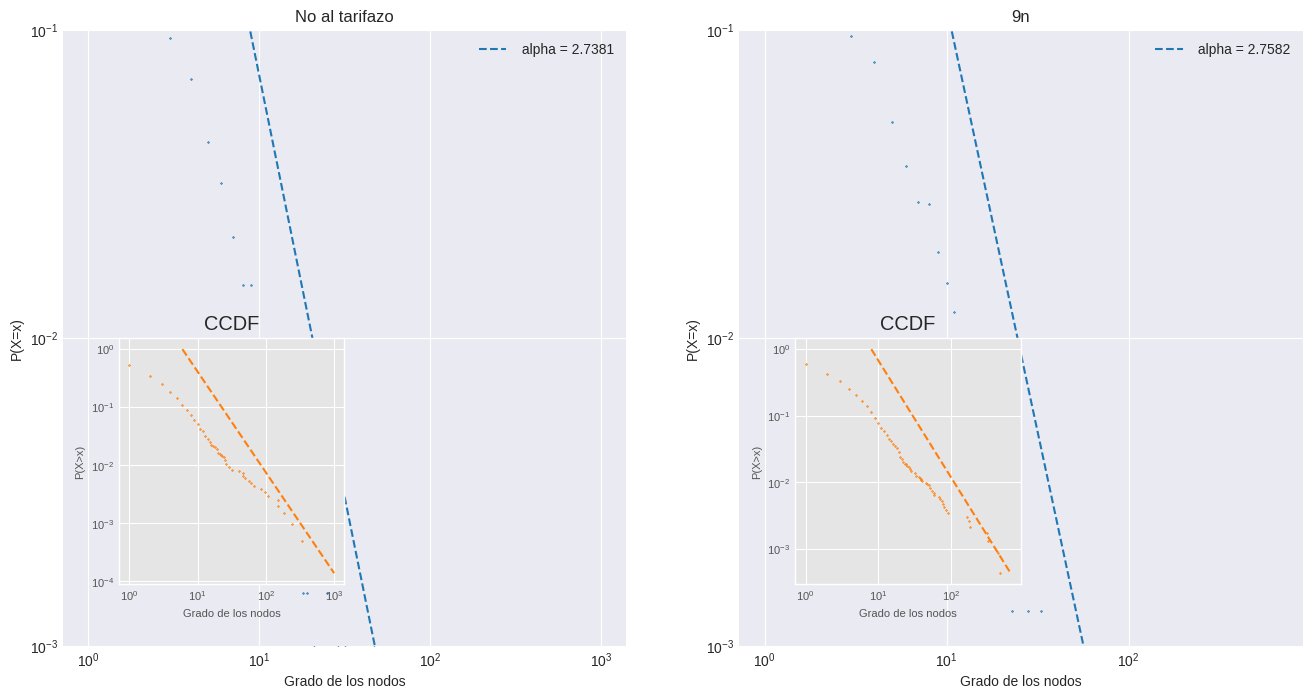

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,8)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=axs[0], linestyle='--')
axs[0].set_ylim(0.001, 0.1)

axs[0].set_xlabel("Grado de los nodos")
axs[0].set_ylabel("P(X=x)")
axs[0].set_title("No al tarifazo")
axs[0].legend()

with plt.style.context('ggplot'):
    ins_ax_nat = axs[0].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    

axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=axs[1], linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
axs[1].legend()
axs[1].set_ylim(0.001, 0.1)

axs[1].set_xlabel("Grado de los nodos")
axs[1].set_ylabel("P(X=x)")
axs[1].set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = axs[1].inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
    

#plt.autoscale(tight=True)
# TODO no se guarda bien, mucho borde y ejes mal
plt.savefig("plots/PDF_CCDFs_nodes_bipartite.png")
plt.show()



### Autosimilitud

In [92]:
def calc_plots(name_graph, MAX_UMBRAL, graphs_folder, measures_name, deg=True, mode="b"):
    G = load_graph(name_graph, graphs_folder)
    return calc_clust(G, MAX_UMBRAL, measures_name, deg=deg, mode=mode)

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_tres_avg_clust_fig2e_nat_b, dict_norm_int_deg_fig2a_nat_b = calc_plots("429624", MAX_UMBRAL, "graphs/nodes_bipartite/nat/", "measures/nat/429624", deg=True)
dict_tres_avg_clust_fig2e_9n_b, dict_norm_int_deg_fig2a_9n_b = calc_plots("437037", MAX_UMBRAL, "graphs/nodes_bipartite/9n/", "measures/9n/437037", deg=True)

graphs/nodes_bipartite/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 2016, numero de aristas: 4377


 13%|█▎        | 32/250 [00:00<00:00, 407.05it/s]


graphs/nodes_bipartite/9n/437037.gexf
Cargado el grafo de la hora 437037, numero de nodos: 2314, numero de aristas: 6162


 16%|█▌        | 40/250 [00:00<00:00, 366.16it/s]


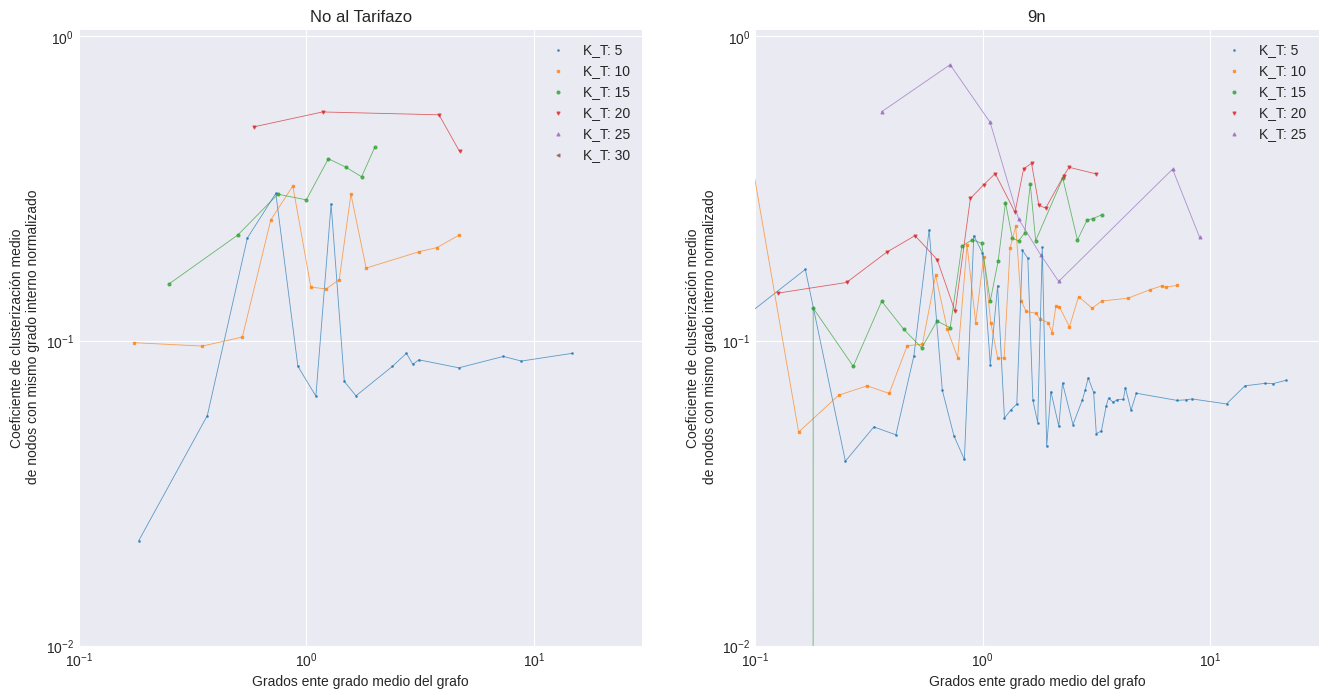

In [93]:
alpha = 0.7
arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_fig2a_nat_b.keys():
        points_x = list(dict_norm_int_deg_fig2a_nat_b[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_fig2a_nat_b[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_b[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grados ente grado medio del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.1, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_fig2a_9n_b.keys():
        points_x = list(dict_norm_int_deg_fig2a_9n_b[kt].keys())
        points_y = list(dict_norm_int_deg_fig2a_9n_b[kt].values())
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_fig2a_9n_b[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grados ente grado medio del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.1, 30)
ax2.legend()
ax2.set_title("9n")
plt.show()

### Clustering promedio

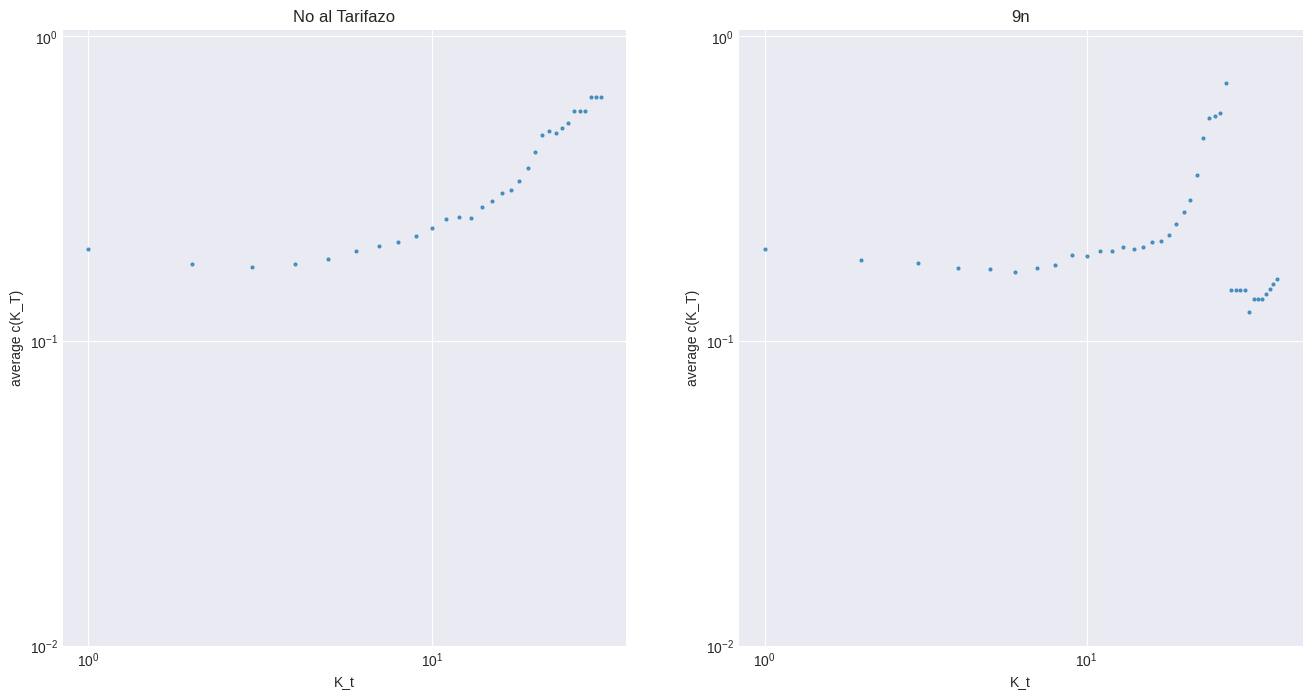

<Figure size 1400x700 with 0 Axes>

In [94]:
alpha = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_tres_avg_clust_fig2e_nat_b.keys())[:MAX_UMBRAL]
clust_nat = list(dict_tres_avg_clust_fig2e_nat_b.values())[:MAX_UMBRAL]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_tres_avg_clust_fig2e_9n_b.keys())[:MAX_UMBRAL]
clust_9n = list(dict_tres_avg_clust_fig2e_9n_b.values())[:MAX_UMBRAL]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")



plt.show()

# Box counting fractality

Longitud de caja: 1, Número de cajas: 870
Longitud de caja: 2, Número de cajas: 245
Longitud de caja: 3, Número de cajas: 118
Longitud de caja: 4, Número de cajas: 68
Longitud de caja: 5, Número de cajas: 61
Longitud de caja: 6, Número de cajas: 61
Longitud de caja: 7, Número de cajas: 61
Longitud de caja: 8, Número de cajas: 61
Longitud de caja: 9, Número de cajas: 61
Longitud de caja: 10, Número de cajas: 61


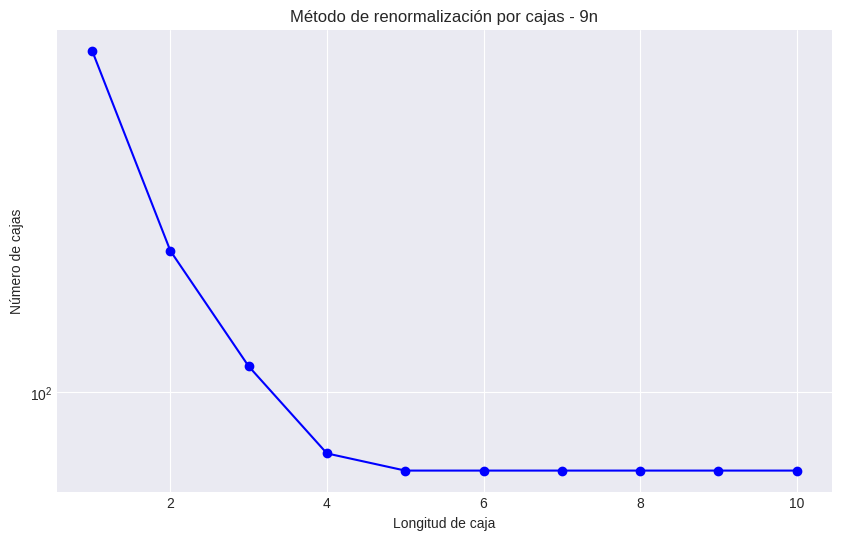

Longitud de caja: 1, Número de cajas: 642
Longitud de caja: 2, Número de cajas: 279
Longitud de caja: 3, Número de cajas: 115
Longitud de caja: 4, Número de cajas: 77
Longitud de caja: 5, Número de cajas: 73
Longitud de caja: 6, Número de cajas: 73
Longitud de caja: 7, Número de cajas: 73
Longitud de caja: 8, Número de cajas: 73
Longitud de caja: 9, Número de cajas: 73
Longitud de caja: 10, Número de cajas: 73


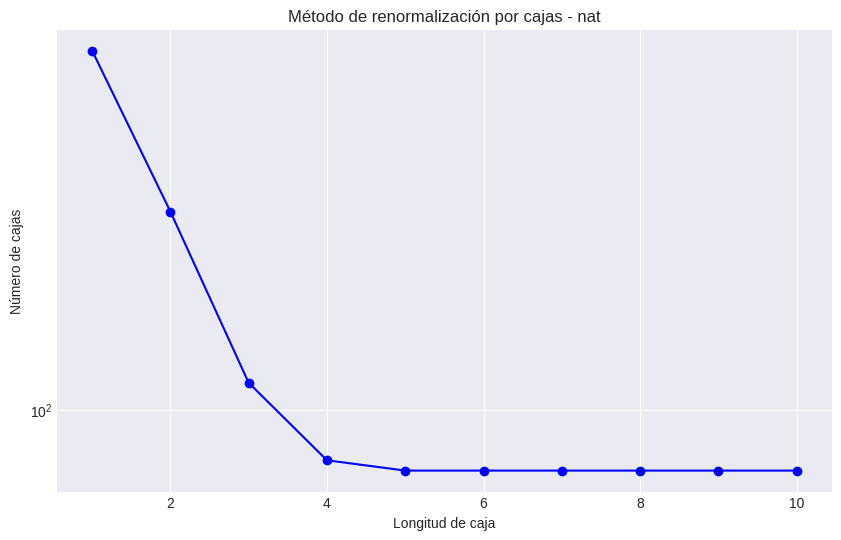

In [153]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
from networkx.algorithms.components import connected_components

def box_counting(graph, box_size):
    """
    Implementa el método de renormalización por cajas.
    
    Parameters:
    graph (networkx.Graph): El grafo de entrada.
    box_size (int): El número máximo de nodos que puede contener cada caja.
    
    Returns:
    int: El número de cajas necesarias.
    """
    boxes = []  # Lista de cajas

    # Iterar sobre las componentes conexas del grafo
    for component in connected_components(graph):
        subgraph = graph.subgraph(component).copy()
        while len(subgraph) > 0:
            # Selecciona un nodo aleatorio como centro de la caja
            if subgraph.number_of_nodes() > 1:
                rand = random.sample(range(0, subgraph.number_of_nodes()-1), 1)[0]
            else:
                rand = 0
            node = list(subgraph.nodes())[rand]
            
            # Encuentra todos los nodos a una distancia <= box_size - 1 desde el nodo central
            box_nodes = nx.single_source_shortest_path_length(subgraph, node, cutoff=box_size-1).keys()
            box_nodes = list(box_nodes)
            
            # Añadir la caja a la lista de cajas y eliminar sus nodos del subgrafo
            boxes.append(box_nodes)
            subgraph.remove_nodes_from(box_nodes)

    return len(boxes)

def plot_box_counting(graph, box_sizes, nombre):
    """
    Genera un gráfico del número de cajas encontradas para cada valor de longitud de caja.
    
    Parameters:
    graph (networkx.Graph): El grafo de entrada.
    box_sizes (list): Lista de valores de longitud de caja.
    """
    num_boxes = []
    
    for box_size in box_sizes:
        count = box_counting(graph, box_size)
        num_boxes.append(count)
        print(f'Longitud de caja: {box_size}, Número de cajas: {count}')
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(box_sizes, num_boxes, marker='o', linestyle='-', color='b')
    plt.xlabel('Longitud de caja')
    plt.yscale('log')
    plt.ylabel('Número de cajas')
    plt.title('Método de renormalización por cajas - ' + nombre)
    plt.grid(True)
    plt.show()

# Cargar el grafo desde un archivo GEXF
graph = nx.read_gexf('graphs/nodes_hashtag/9n/437037.gexf')

# Definir los tamaños de las cajas a considerar
box_sizes = range(1, 11)

# Generar el gráfico de Box Counting
plot_box_counting(graph, box_sizes, "9n")

# Cargar el grafo desde un archivo GEXF
graph = nx.read_gexf('graphs/nodes_hashtag/nat/429624.gexf')

# Definir los tamaños de las cajas a considerar
box_sizes = range(1, 11)

# Generar el gráfico de Box Counting
plot_box_counting(graph, box_sizes, "nat")

